<a href="https://colab.research.google.com/github/SitiFadhilahRahmi/DIF62130_A_25_2311532003_SITI-FADHILAH-RAHMI/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

- Import library yang diperlukan seperti pandas, numpy, sklearn, dll
- upload dataset ke github

In [110]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/SitiFadhilahRahmi/DIF62130_A_25_2311532003_SITI-FADHILAH-RAHMI/refs/heads/main/dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Selecting Features

Membagi data menjadi dua buah yaitu data berisi variabel dependent atau target variable dan independent variabel atau variabel fitur

In [111]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = df[feature_cols]
y = df.Outcome

In [112]:
print(x.shape)
print(y.shape)

(768, 7)
(768,)


# Splitting Data

- Split dataset menggunakan fungsi train_test_split
- Perlu tiga fitur yaitu fitur, target, dan tes set size
- Bagi dataset menjadi 70 persen data training dan 30 data testing

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=16)

# Model Development and Prediction

- import ligistic regression module
- buat logistic regression classifier object menggunakan LogisticRegression() function
- Fit model on the train set using fit() and perform prediction on the test set using set()

In [114]:
#import module
from sklearn.linear_model import LogisticRegression

#inisiasi model
logreg = LogisticRegression(random_state=16)

#fit model
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Model evaluation using confusion matrix

tabel untuk mengevaluasi kinerja model klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya dari data uji. Ada 4 komponen utama:

- True P0sitive (TP)
  - Model memprediksi positif dan hasilnya memang positif
  - Contoh email mendeteksi spam dan memang benar spam
- False Positive (FP)
  - Model memprediksi positif tetapi hasilnya negatif
  - Contoh email mengira spam tetapi sebenarnya bukan spam
- False Negative (FN)
  - Model memprediksi negatif  tetapi hasil sebenarnya positif
  - Contoh model mengira email bukan spam tetapi sebenarnya spam
- True Negative (TN)
  - Model memprediksi negatif dan memang negatif
  - Contoh model mendeteksi email bukan spam dan emmang benar

In [115]:
#import metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

Text(0.5, 1.1, 'Confusion Matrix')

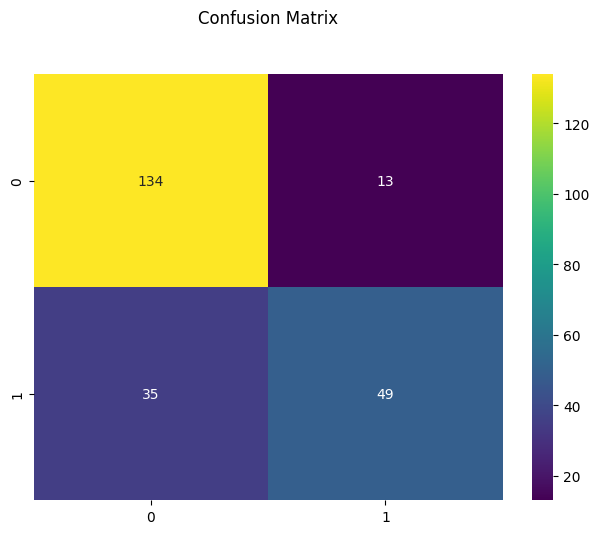

In [116]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='viridis', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)

# Confution Matrix evaluation metrcis

Dari confusion matrix kita dapat menghitung berbagai metrix evaluasi untuk memahami:
- Akurasi - Seberapa akurat prediksi
- Presisi - seberapa banyak prediksi positif benar
- Recall - Seberapa baik model menagkap semua kasus positif
- F1 Score - Rata-rata harmoni antara presisi dan recall
- Specivicity - Seberapa baik model mengenali kelas negatif

In [117]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231



# ROC Curve

Receiver Operating Characteristic yaitu grafik untuk mengevaluasi kinerja model klasifikasi terutama binary klasifikasi. menunjukkan keseimbangan antara TPR dan FPR pada berbagai ambang batas

Sangat berguna ketika ingin memahami seberapa baik model membedakan kelas positif dan negatif terutama data yang distribusinya tidak seimbang.

ROC yang bagus mendekati pojok kiri atas menandakan model banyak True Positif dan sedikit False Positif

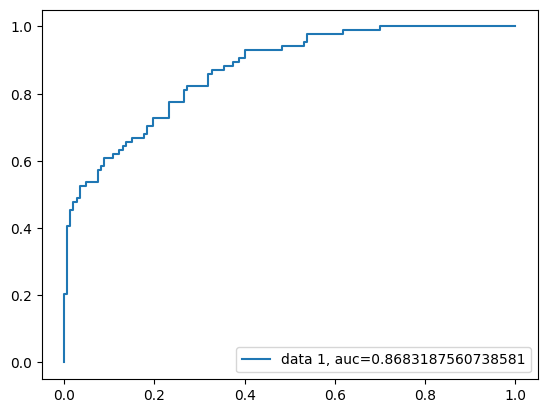

In [118]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1, auc=' + str(auc))
plt.legend(loc=4)
plt.show()

**Area Under Curve (AUC)**
- Untuk mempermudah menginterpretasikan ROC Curve, yaitu luas di bawah ROC Curve
- AUC mengukur seberapa baik model membedakan kelas positif dan negatif (semakin tinggi nilainya semakin baik)
- AUC score kasus di atas adalah o.868